In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

O Cenário anterior tinha o problema dos comboios muito compridos. Limitei o fluxo a 1980 veículos/hora em cada sentido. Comboios de no máximo 22 carros por faixa.

In [2]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/')
dr_events_filename_template = scenarios_folder + '{}/events.xml'

In [3]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if child.attrib['type'] == 'arrival' and (len(prefix) == 0 or (prefix in child.attrib['person'])):
            # Sample arrival event:
            # <event time="918" type="arrival" person="paraiso5_79" vehicle="paraiso5_79" 
            #     link="40" legMode="car" trip_time="205" distance="2825" action="ok"/>

            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [7]:
dfs = []
scenarios = [
    'peak_cet_0_0', 
#     'peak_dr-manual_0_0', 
#     'peak_dr-manual_1_0', 
#     'peak_dr-manual_1_18', 
    'peak_dr-algo_0_0',
#     'peak_dr-algo_1_0',
#     'peak_dr-algo_1_25',
#     'peak_dr-algo_1_50',
#     'peak_dr-algo_1_75',
#     'peak_dr-algo_1_100',
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=scenarios)
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/home/gustavo/Developer/interscsimulator/mock-simulators/smart_city_model/peak_dr-algo_0_0/events.xml'

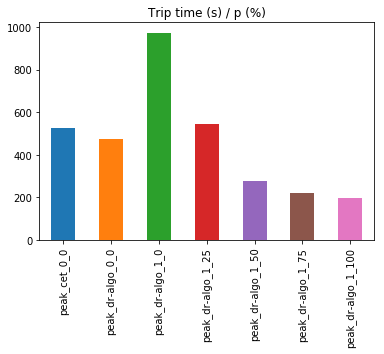

In [57]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time (s) / p (%)')

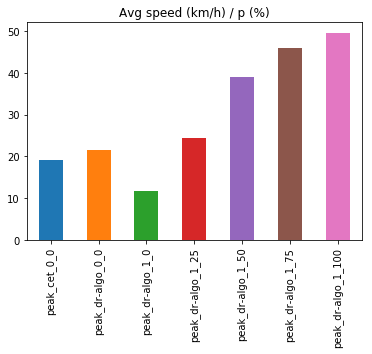

In [58]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed (km/h) / p (%)')

In [59]:
# df.xs('trip_time_s', axis=1, level=1).hist()
# plt.suptitle('Trip time distributions / p')

In [60]:
# df.xs('avg_speed_km/h', axis=1, level=1).hist()
# plt.suptitle('Trip time distributions / p')

In [61]:
dfs = []
scenarios = [
    'peak_cet_0_0', 
#     'peak_dr-manual_0_0', 
#     'peak_dr-manual_1_0', 
#     'peak_dr-manual_1_18', 
    'peak_dr-algo_0_0',
    'peak_dr-algo_1_0',
    'peak_dr-algo_1_25',
    'peak_dr-algo_1_50',
    'peak_dr-algo_1_75',
]

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    dfs.append(dr)
    
df = pd.concat(dfs, axis=1, keys=scenarios)
df.describe()

peak_cet_0_0                peak_dr-algo_0_0                 \
       trip_time_s avg_speed_km/h      trip_time_s avg_speed_km/h   
count  5426.000000    5426.000000      5426.000000    5426.000000   
mean    526.508109      19.021897       472.813859      21.587371   
std      85.880466       2.833300        89.147818       4.930616   
min     325.000000      13.560000       249.000000      12.626365   
25%     459.000000      16.872598       409.000000      17.933629   
50%     530.000000      18.524590       480.000000      20.218337   
75%     597.750000      20.749234       529.000000      24.744526   
max     750.000000      29.824047       751.000000      40.843373   

      peak_dr-algo_1_0                peak_dr-algo_1_25                 \
           trip_time_s avg_speed_km/h       trip_time_s avg_speed_km/h   
count      5426.000000    5426.000000       4069.000000    4069.000000   
mean        972.964799      11.797093        660.475793      16.153602   
std         372.033669       5.044643        176.095397       5.277879   
min         254.000000       5.336185        249.000000       9.388515   
25%         681.000000       7.817312        532.000000      11.221775   
50%         795.000000      12.509225        621.000000      15.963636   
75%        1213.000000      14.890190        845.000000      18.868275   
max        1777.000000      37.806691       1010.000000      40.843373   

      peak_dr-algo_1_50                peak_dr-algo_1_75                 
            trip_time_s avg_speed_km/h       trip_time_s avg_speed_km/h  
count       2712.000000    2712.000000       1355.000000    1355.000000  
mean         350.016962      28.357546        280.894465      35.134014  
std           41.968798       3.646574         26.141105       3.602776  
min          240.000000      19.351837        213.000000      26.194475  
25%          319.000000      25.628108        264.000000      32.811073  
50%          350.000000      27.807625        283.000000      34.709898  
75%          377.250000      30.787013        296.000000      37.116788  
max          490.000000      40.517928        365.000000      45.000000

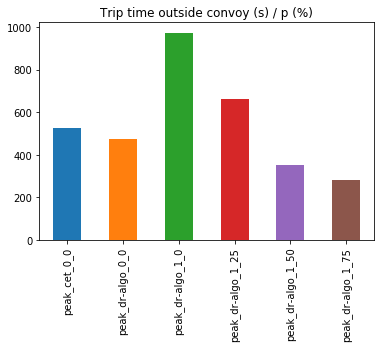

In [62]:
df.xs('trip_time_s', axis=1, level=1).mean().plot(kind='bar', title='Trip time outside convoy (s) / p (%)')

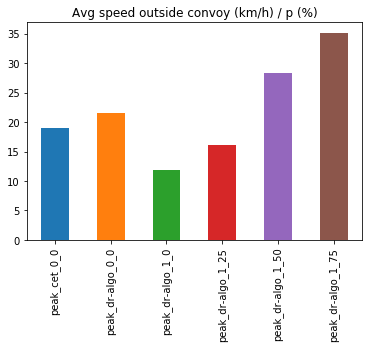

In [63]:
df.xs('avg_speed_km/h', axis=1, level=1).mean().plot(kind='bar', title='Avg speed outside convoy (km/h) / p (%)')

In [64]:
# df.xs('trip_time_s', axis=1, level=1).hist()
# plt.suptitle('Trip time distributions outside convoy / p')

In [65]:
# df.xs('avg_speed_km/h', axis=1, level=1).hist()
# plt.suptitle('Avg speed distributions outside convoy / p')